In [37]:
#coding:utf-8
%matplotlib inline
'''
黑白平衡
'''
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
# 原始灰度世界算法
'''
参考：http://www.cnblogs.com/nsnow/p/4630184.html
https://blog.csdn.net/u012736685/article/details/50730784
（1)直接给定为固定值, 取其各通道最大值的一半,即取为127或128；
（2)令 K = (Raver+Gaver+Baver)/3,其中Raver,Gaver,Baver分别表示红、 绿、 蓝三个通道的平均值。
    算法的第二步是分别计算各通道的增益：

             Kr=K/Raver;

 　　　　　　Kg=K/Gaver;

             Kb=K/Baver;
              算法第三步为根据Von Kries 对角模型,对于图像中的每个像素R、G、B，计算其结果值：

             Rnew = R * Kr;

　　　　　　 Gnew = G * Kg;

　　　　　　 Bnew = B * Kb;
'''
def gray_world(src):
    channels = cv2.split(src)
    b = channels[0]
    g = channels[1]
    r = channels[2]
    
    avg_b = np.mean(np.mean(b))
    avg_g = np.mean(np.mean(g))
    avg_r = np.mean(np.mean(r))
    
    rows,cols,_ = src.shape
    
    avg_rgb = np.array([avg_b,avg_g,avg_r])
    gray_value = (avg_b + avg_g + avg_r) / 3
    scale_value = gray_value / avg_rgb
#     b = np.uint8(scale_value[0] * b)
#     g = np.uint8(scale_value[1] * g)
#     r = np.uint8(scale_value[2] * r)
    result = np.zeros_like(src)
    for y in range(rows):
        for x in range(cols):
            pixel_b = b[y,x] * scale_value[0]
            pixel_g = g[y,x] * scale_value[1]
            pixel_r = r[y,x] * scale_value[2]
            
            if pixel_b > 255:
                pixel_b = 255
            if pixel_g > 255:
                pixel_g = 255
            if pixel_r > 255:
                pixel_r = 255
                
            result[y,x,0] = pixel_b
            result[y,x,1] = pixel_g
            result[y,x,2] = pixel_r
            
    return result

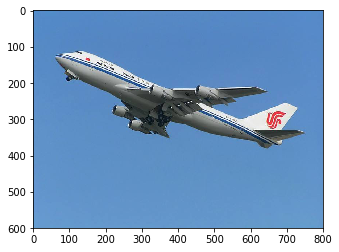

In [39]:
src = cv2.imread('datas/plane.jpg')
plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))

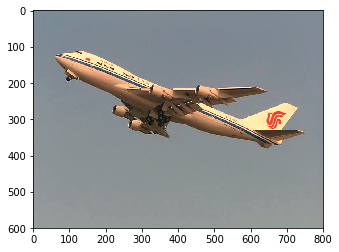

In [40]:
res = gray_world(src)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

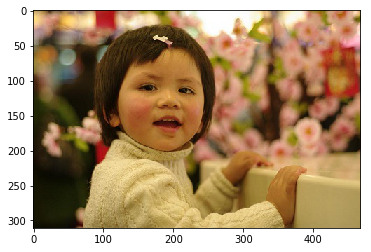

In [41]:
src = cv2.imread('datas/p1.jpg')
plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))

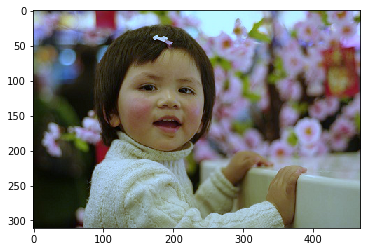

In [42]:
res = gray_world(src)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

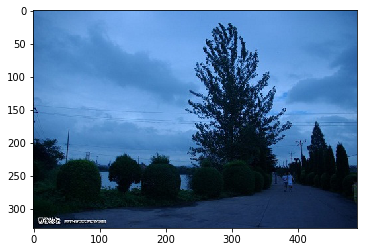

In [43]:
src = cv2.imread('datas/p3.jpg')
plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))

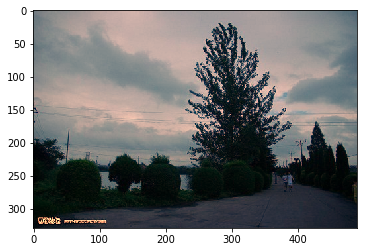

In [44]:
res = gray_world(src)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

In [45]:
# 改进灰度世界算法
def white_pathc_retinex(src,para = 0):
    res = np.zeros_like(src)
    src_float = np.float32(src)
    
    L = np.array([0,0,0])
    channels = cv2.split(src)
    channels_res = cv2.split(res)
    channels_src_float = cv2.split(src_float)
    if para == 0:
        for i in range(3):
            L[i] = np.max(np.max(channels[i]))
            channels_res[i] = channels_src_float[i] / L[i]
    else:
        scale = 0.1 * src.shape[1] * src.shape[0]
        for i in range(3):
            H = cv2.calcHist([src],[i],None,[256],[0,256])
            j = 256
            sum_val = 0
            
            while (sum_val < scale) and (j > 1):
                j -= 1
                sum_val = sum_val + H[j]
                L[i] = j
            channels_res[i] = np.uint8(channels_src_float[i] / L[i])
                
    return cv2.merge(channels_res)

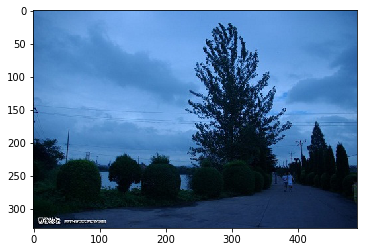

In [46]:
src = cv2.imread('datas/p3.jpg')
plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))

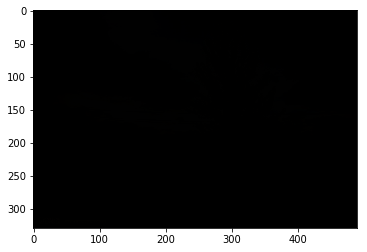

In [47]:
res = white_pathc_retinex(src,1)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))